In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import glob
sns.set_style('darkgrid')

In [2]:
import warnings
warnings.simplefilter('ignore')

In [6]:
path = r"Historical_DataSets"
all_files = glob.glob(path+"/*.csv")
li = []
for files in all_files:
    df = pd.read_csv(files)
    df['Date'] = df['Date'].apply(pd.to_datetime)
    df.set_index('Date', inplace=True)
    df['Company'] = files.split(sep='\\')[-1].split('_')[0].split(".")[0]
    li.append(df)
    
    """
    check = (df.index == '2020-08-25') & (df['Close']<=1000) & (df['Close']>=100)
    if(check.any() == True):
        li.append(df)
    else :
        continue
    """

data = pd.concat(li, axis = 0)

In [7]:
data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Company
Date,,,,,,,,,,,,,
2015-04-01,36.50,38.65,35.90,37.05,36.839990,51478.0,296.0,1896449.0,39853.0,77.42,2.75,0.55,20 Microns Ltd
2015-04-06,37.95,39.00,37.20,37.90,37.719535,54506.0,161.0,2055941.0,44601.0,81.83,1.80,-0.05,20 Microns Ltd
2015-04-07,38.50,39.70,35.55,36.60,37.159821,20573.0,176.0,764489.0,9563.0,46.48,4.15,-1.90,20 Microns Ltd
2015-04-08,36.70,38.50,36.65,37.15,36.872511,12456.0,161.0,459284.0,1541.0,12.37,1.85,0.45,20 Microns Ltd
2015-04-09,35.60,42.60,35.50,40.60,36.989427,162391.0,1068.0,6006750.0,99494.0,61.27,7.10,5.00,20 Microns Ltd


In [8]:
print("********List of Companies******")
companyName = data["Company"].unique()
for i in companyName:
    print(i)

********List of Companies******
20 Microns Ltd
3i Infotech Ltd
3m India Ltd
7seas Technologies Ltd-$
8k Miles Software Services Ltd
A
A2z Infra Engineering Limited
Aadhaar Ventures India Ltd
Aadi Industries Ltd
Aagam Capital Ltd
Aananda Lakshmi Spinning Mills Ltd
Aanchal Ispat Ltd
Aarey Drugs & Pharmaceuticals Ltd
Aarti Drugs Ltd
Aarti Industries Ltd
Aarvee Denims & Exports Ltd
Aarya Global Shares And Securities Ltd
Aashee Infotech Ltd
Aban Offshore Ltd
Abans Enterprises Ltd
Abb India Limited
Abbott India Ltd
Abc Bearings Ltd
Abc Gas (international) Ltd
Abc India Ltd
Abg Shipyard Ltd
Abhinav Capital Services Ltd
Abhinav Leasing & Finance Ltd
Abhishek Corporation Ltd
Abhishek Finlease Ltd
Abirami Financial Services (india) Ltd
Abl Biotechnologies Ltd
Abm Knowledgeware Ltd
Acc Ltd
Accel Frontline Ltd
Accel Transmatic Ltd
Accelya Kale Solutions Limitd
Acclaim Industries Limited
Accurate Transformers Ltd
Ace Edutrend Ltd
Ace Software Exports Ltd
Ace Tours Worldwide Ltd
Achal Investments Lt

In [14]:
CompanyName = "20 Microns Ltd"

In [15]:
result = data[data['Company'] == CompanyName]
result.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Company
Date,,,,,,,,,,,,,
2015-04-01,36.50,38.65,35.90,37.05,36.839990,51478.0,296.0,1896449.0,39853.0,77.42,2.75,0.55,20 Microns Ltd
2015-04-06,37.95,39.00,37.20,37.90,37.719535,54506.0,161.0,2055941.0,44601.0,81.83,1.80,-0.05,20 Microns Ltd
2015-04-07,38.50,39.70,35.55,36.60,37.159821,20573.0,176.0,764489.0,9563.0,46.48,4.15,-1.90,20 Microns Ltd
2015-04-08,36.70,38.50,36.65,37.15,36.872511,12456.0,161.0,459284.0,1541.0,12.37,1.85,0.45,20 Microns Ltd
2015-04-09,35.60,42.60,35.50,40.60,36.989427,162391.0,1068.0,6006750.0,99494.0,61.27,7.10,5.00,20 Microns Ltd


In [11]:
def RollExpand(comp):
    result['Close'].rolling(window=20).mean().plot(label='Close Rolling 20 Days')
    result['Close'].expanding(min_periods=1).mean().plot(label='Close expanding')
    result['Close'].plot(figsize=(16,7), label='Close')
    plt.legend()
    plt.title(comp)

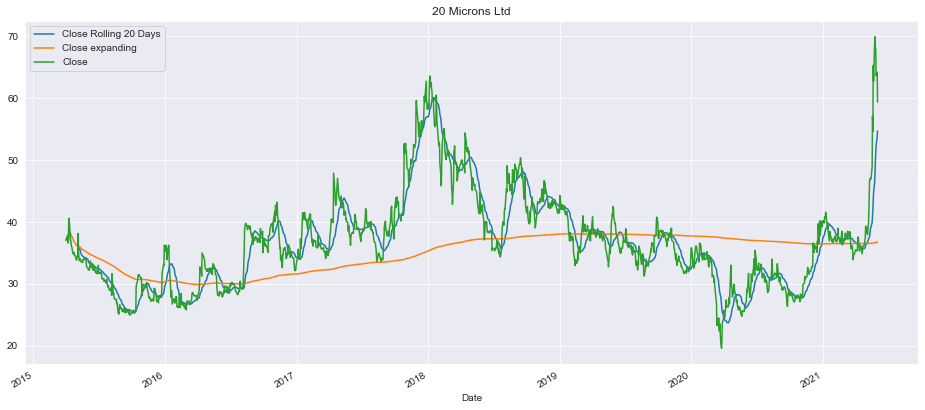

In [12]:
RollExpand("20 Microns Ltd")

In [13]:
def BollingerBand(comp):
    result['Close_30_Day_Min'] = result['Close'].rolling(window=30).mean()
    result['Upper_Band'] = result['Close_30_Day_Min']+ 2*result['Close'].rolling(window=30).std()
    result['Lower_Band'] = result['Close_30_Day_Min']- 2*result['Close'].rolling(window=30).std()
    result[['Close','Close_30_Day_Min','Upper_Band','Lower_Band']].plot(figsize=(18,10))
    plt.title(comp)

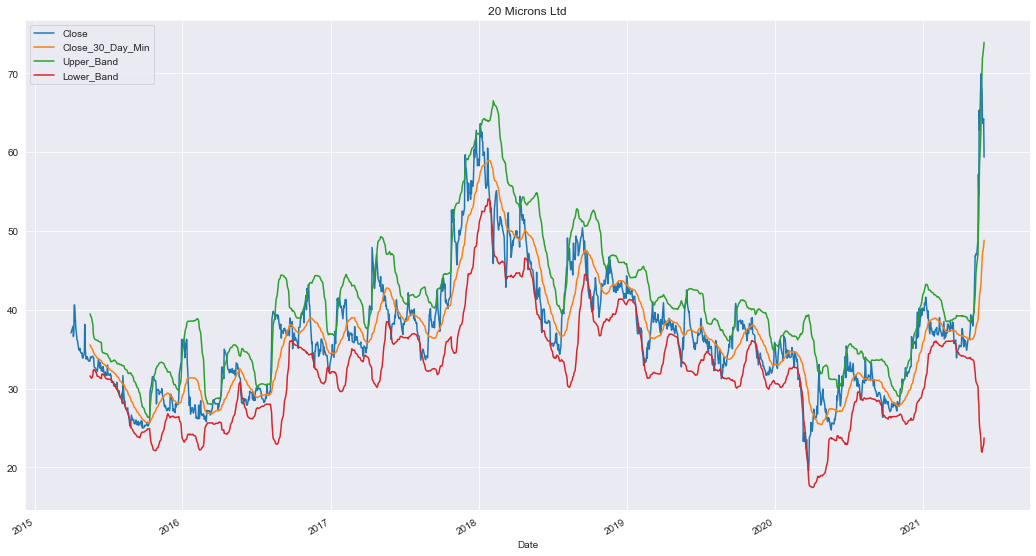

In [16]:
BollingerBand(CompanyName)

<AxesSubplot:xlabel='Date'>

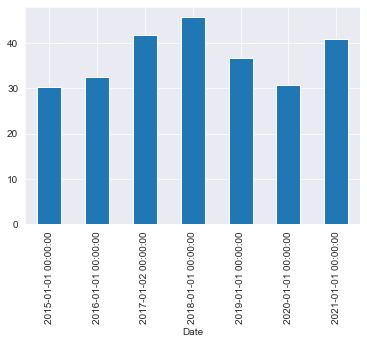

In [17]:
result['Close'].resample('BAS').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

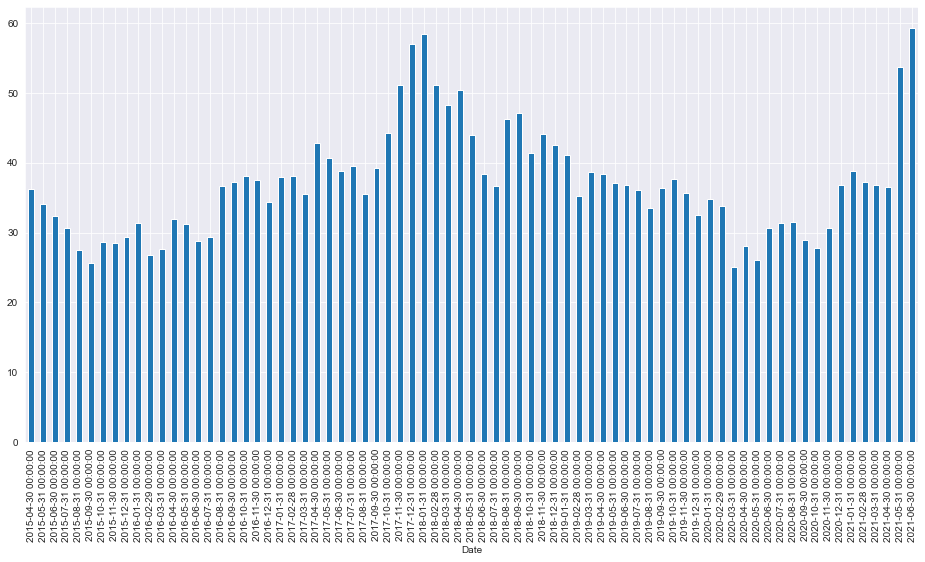

In [18]:
result['Close'].resample('M').mean().plot(kind='bar',figsize=(16,8))

In [20]:
result['Total_Traded'] = result['Open']*result['No. of Shares']

<AxesSubplot:xlabel='Date'>

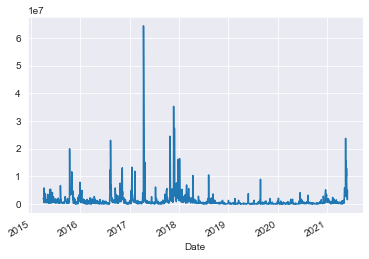

In [21]:
result['Total_Traded'].plot()

In [24]:
result[result['Total_Traded'] == result['Total_Traded'].max()]

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Company,Close_30_Day_Min,Upper_Band,Lower_Band,Total_Traded
Date,,,,,,,,,,,,,,,,,
2017-04-13,39.7,47.9,39.7,47.9,47.07,1621293.0,3781.0,76321822.0,396645.0,24.46,8.2,8.2,20 Microns Ltd,36.92,42.616194,31.223806,64365332.1


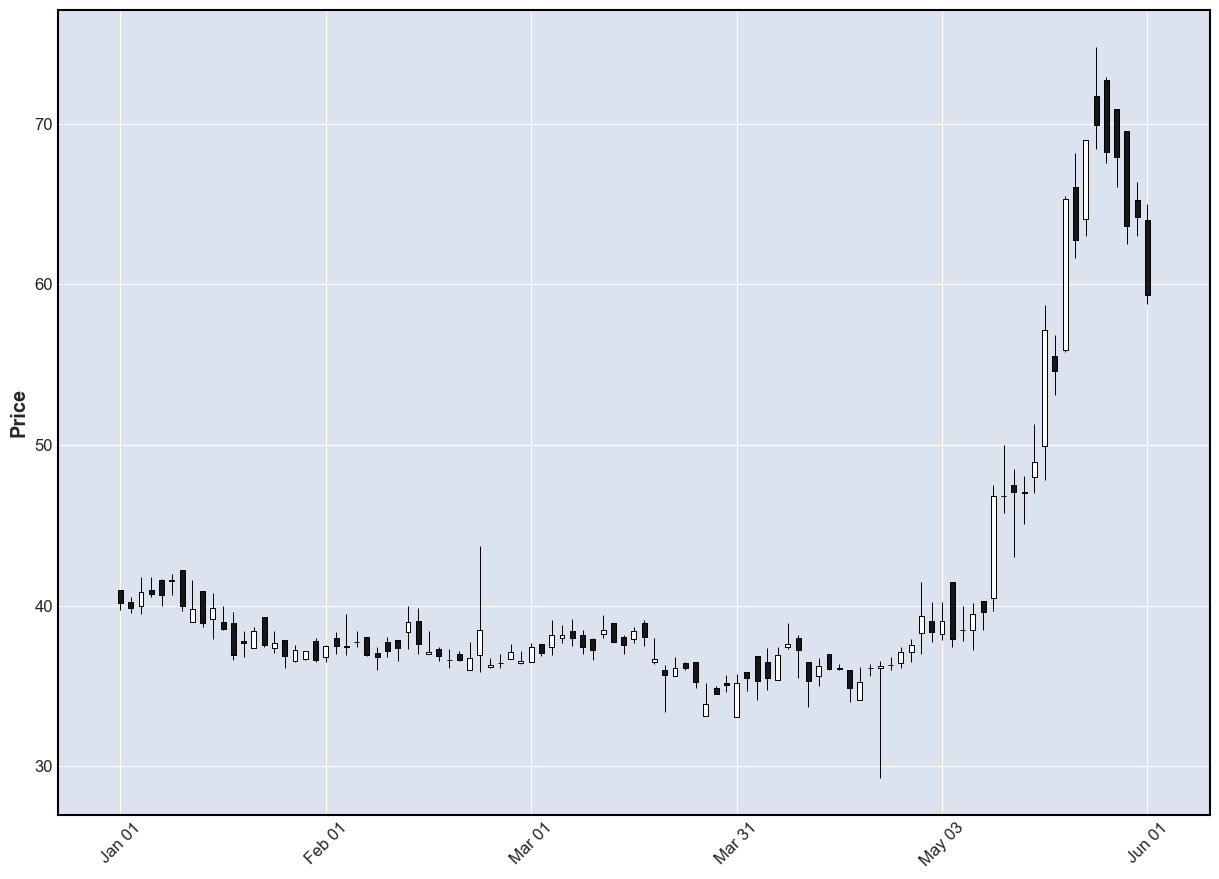

In [26]:
mpl.plot(result.loc['2021-01-01':'2021-06-01'], type='candle',figscale=2)


In [28]:
result['Return'] = result['Close'].pct_change()
result.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Company,Close_30_Day_Min,Upper_Band,Lower_Band,Total_Traded,Return
Date,,,,,,,,,,,,,,,,,,
2015-04-01,36.50,38.65,35.90,37.05,36.839990,51478.0,296.0,1896449.0,39853.0,77.42,2.75,0.55,20 Microns Ltd,NaN,NaN,NaN,1878947.0,NaN
2015-04-06,37.95,39.00,37.20,37.90,37.719535,54506.0,161.0,2055941.0,44601.0,81.83,1.80,-0.05,20 Microns Ltd,NaN,NaN,NaN,2068502.7,0.022942
2015-04-07,38.50,39.70,35.55,36.60,37.159821,20573.0,176.0,764489.0,9563.0,46.48,4.15,-1.90,20 Microns Ltd,NaN,NaN,NaN,792060.5,-0.034301
2015-04-08,36.70,38.50,36.65,37.15,36.872511,12456.0,161.0,459284.0,1541.0,12.37,1.85,0.45,20 Microns Ltd,NaN,NaN,NaN,457135.2,0.015027
2015-04-09,35.60,42.60,35.50,40.60,36.989427,162391.0,1068.0,6006750.0,99494.0,61.27,7.10,5.00,20 Microns Ltd,NaN,NaN,NaN,5781119.6,0.092867


<AxesSubplot:xlabel='Return', ylabel='Count'>

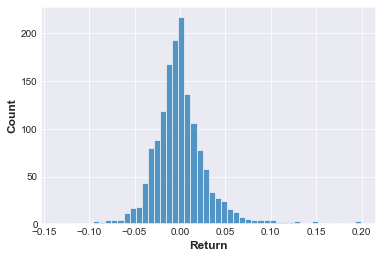

In [30]:
sns.histplot(result['Return'], bins=50)

<AxesSubplot:ylabel='Density'>

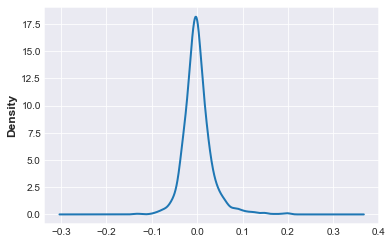

In [31]:
result['Return'].plot(kind='kde')

<AxesSubplot:>

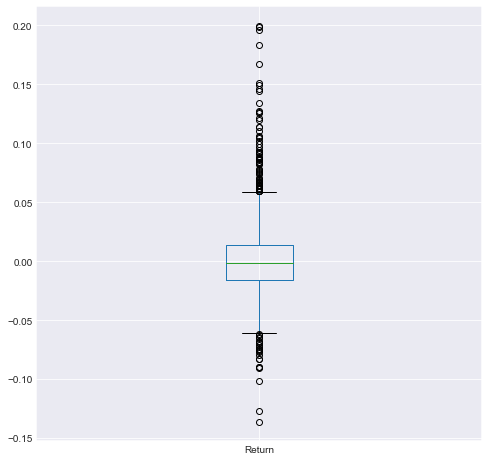

In [32]:
result['Return'].plot(kind='box',figsize=(8,8))

In [35]:
result[result['Return'] == result['Return'].max()]

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,Company,Close_30_Day_Min,Upper_Band,Lower_Band,Total_Traded,Return
Date,,,,,,,,,,,,,,,,,,
2016-08-08,29.65,35.5,29.15,35.5,31.4,184794.0,491.0,5802884.0,111736.0,60.47,6.35,5.85,20 Microns Ltd,29.535,32.102053,26.967947,5479142.1,0.199324


In [36]:
result['Cummulative Return'] = (1 + result['Return']).cumprod()

<AxesSubplot:xlabel='Date'>

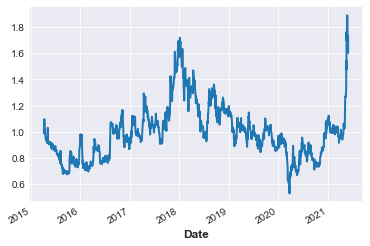

In [37]:
result['Cummulative Return'].plot()

Simple Moving Average (SMA)

<AxesSubplot:xlabel='Date'>

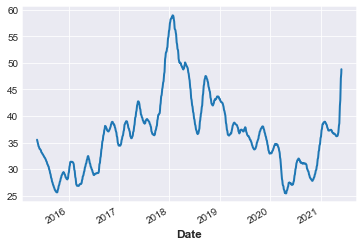

In [38]:
result['Close'].rolling(window=30).mean().plot()

Exponentially Weighted-Moving Average

<AxesSubplot:xlabel='Date'>

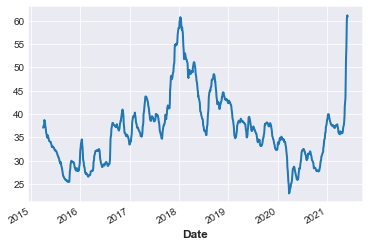

In [39]:
result['Close'].ewm(span=12).mean().plot()

In [40]:
result.dropna(inplace=True)

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal = seasonal_decompose(result['Close'],freq=5,model='multiplicative')

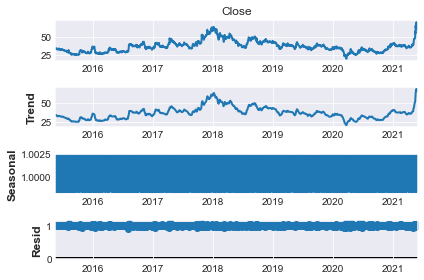

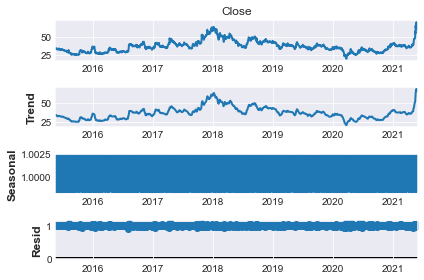

In [42]:
seasonal.plot()

In [44]:
result["delta"] = delta = result['Close'].diff()

In [47]:
result["up"] = up = delta.clip(lower=0)

In [49]:
result["down"] = down = -1 * delta.clip(upper=0)

In [51]:
result.drop(['WAP', 'No. of Shares', 'No. of Trades','Total Turnover', '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O'], axis=1, inplace=True)

In [52]:
result.head()

,Open,High,Low,Close,Deliverable Quantity,Company,Close_30_Day_Min,Upper_Band,Lower_Band,Total_Traded,Return,Cummulative Return,delta,up,down
Date,,,,,,,,,,,,,,,
2015-05-18,33.50,33.70,33.25,33.50,386.0,20 Microns Ltd,35.540000,39.472219,31.607781,314933.50,0.000000,0.904184,NaN,NaN,NaN
2015-05-19,33.60,34.50,33.25,34.00,78410.0,20 Microns Ltd,35.438333,39.366717,31.509950,2677516.80,0.014925,0.917679,0.50,0.50,-0.0
2015-05-20,33.75,34.25,33.55,33.90,141757.0,20 Microns Ltd,35.305000,39.158467,31.451533,5252748.75,-0.002941,0.914980,-0.10,0.00,0.1
2015-05-21,34.50,34.50,33.70,33.90,303.0,20 Microns Ltd,35.215000,39.069433,31.360567,374497.50,0.000000,0.914980,0.00,0.00,-0.0
2015-05-22,33.75,34.20,33.55,34.05,1855.0,20 Microns Ltd,35.111667,38.917351,31.305983,375975.00,0.004425,0.919028,0.15,0.15,-0.0


In [53]:
ema_up = up.ewm(span=14, adjust=False).mean()
ema_down = down.ewm(span=14, adjust=False).mean()

In [55]:
result.dropna()
rs = ema_up/ema_down
result['RSI'] = 100 - ( 100 / (rs + 1))

<AxesSubplot:xlabel='Date'>

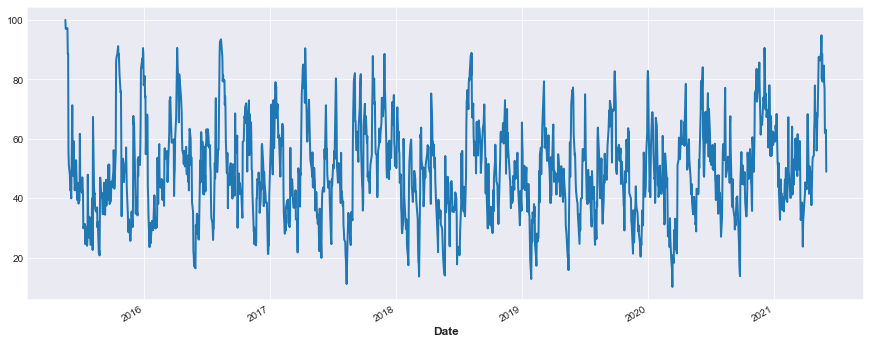

In [57]:
result['RSI'].plot(figsize=(15,6))